In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from qmplot import manhattanplot, qqplot
%matplotlib inline 
import numpy as np

# 1. PCA of first two components

command: plink --vcf genotypes.vcf --pca

In [11]:
df_pca = pd.read_csv("plink.eigenvec", header = None, sep = " ")
df_pca.columns = ['ID1','ID2','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20']
df_pca

,ID1,ID2,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
0,1001,1001,-0.011308,-0.049610,-0.072624,-0.023323,0.043175,-0.048728,-0.127978,0.191397,...,0.096545,-0.153678,0.071009,-0.005070,-0.051850,-0.124780,-0.150898,-0.084354,-0.153340,-0.011041
1,1002,1002,-0.004055,-0.040953,-0.057589,-0.015546,0.035741,-0.043017,-0.087314,0.134233,...,0.064964,-0.118097,0.053080,0.000554,-0.034731,-0.093265,-0.106108,-0.051624,-0.102059,-0.012970
2,1003,1003,-0.013342,-0.038246,-0.050396,-0.014688,0.025219,-0.034451,-0.101281,0.150250,...,0.074239,-0.109622,0.049124,-0.008641,-0.045960,-0.083171,-0.108233,-0.071087,-0.123823,-0.002551
3,1004,1004,0.031194,0.049359,-0.030773,-0.061488,-0.124069,-0.107076,-0.095445,0.056787,...,-0.068472,0.190799,-0.043879,0.009271,0.065305,0.164456,0.126833,0.143317,-0.153845,0.224120
4,1005,1005,0.022213,0.030567,-0.021987,-0.051198,-0.093088,-0.068852,-0.054301,0.043353,...,-0.041638,0.139004,-0.015425,0.006282,0.049240,0.121767,0.100896,0.107745,-0.116885,0.157878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1172,1172,0.016668,-0.006058,-0.027844,0.063584,-0.087714,-0.108294,0.055890,-0.033144,...,0.069430,0.035812,0.056635,0.060608,0.039017,-0.026272,0.041630,0.008775,0.020674,-0.142412
172,1173,1173,0.022931,0.013074,-0.018204,0.066837,-0.099133,-0.098718,0.049424,-0.051004,...,0.085260,0.034335,0.055187,0.077056,0.049599,-0.013411,0.050939,0.003113,0.007984,-0.148249
173,1174,1174,0.018969,-0.026133,-0.017855,0.050315,0.025578,-0.090791,0.156150,-0.136859,...,-0.028247,-0.038486,0.060150,-0.099417,-0.073490,-0.059118,-0.049275,-0.129680,0.063625,0.088822
174,1175,1175,0.010821,-0.015036,-0.006342,0.026647,0.023291,-0.066618,0.110722,-0.088053,...,-0.020084,-0.035794,0.044745,-0.068716,-0.057270,-0.046110,-0.040691,-0.093583,0.050406,0.059395


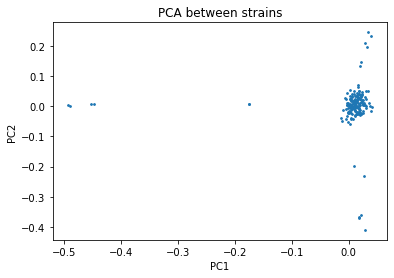

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = df_pca['PC1'], y = df_pca['PC2'], s=3)
ax.set_title("PCA between strains")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

# 2. Histogram of allele frequencies

command: plink --vcf genotypes.vcf --freq

In [26]:
allele_freq_df = pd.read_csv("plink.frq", delim_whitespace=True)
allele_freq_df

,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,rs9699599,G,A,0.11630,172
1,1,rs12138618,A,G,0.05747,174
2,1,rs3131969,G,A,0.30300,330
3,1,rs6672353,A,G,0.12210,172
4,1,rs13302982,G,A,0.27540,334
...,...,...,...,...,...,...
256891,22,rs762672,T,C,0.22160,334
256892,22,rs131711,C,G,0.06790,162
256893,22,rs2341011,C,T,0.48300,352
256894,22,rs9628187,T,C,0.22750,334


In [25]:
MAF = allele_freq_df.iloc[:,4]
MAF

0         0.11630
1         0.05747
2         0.30300
3         0.12210
4         0.27540
           ...   
256891    0.22160
256892    0.06790
256893    0.48300
256894    0.22750
256895    0.47010
Name: MAF, Length: 256896, dtype: float64

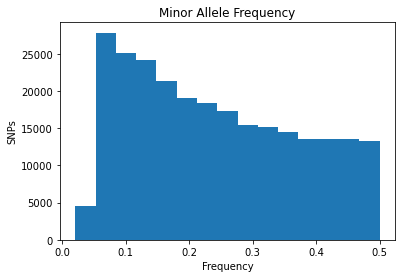

In [23]:
fig, ax = plt.subplots()
ax.hist(MAF, bins =15)
ax.set_title("Minor Allele Frequency")
ax.set_xlabel("Frequency")
ax.set_ylabel("SNPs")
plt.show()

# 3. Quantitative association testing

command = plink --vcf genotypes.vcf  --linear --pheno CB1908_IC50.txt --covar plink.eigenvec --covar-number 1-10 --allow-no-sex --out CB1908_IC50

command = plink --vcf genotypes.vcf --linear --pheno GS451_IC50.txt --covar plink.eigenvec --covar-number 1-10 --allow-no-sex --out GS451_IC50

these commands generated .qassoc files with the results

# 4. For each phenotype, produce a QQ plot and Manhattan plot

Manhattan plot

In [33]:
dfCB = pd.read_table("CB1908_IC50.use",delim_whitespace=True) 
dfCB = dfCB.dropna(how="any", axis=0)
dfCB

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
0,1,rs9699599,558185,G,ADD,84,1.17200,1.8410,0.06976
1,1,rs12138618,740098,A,ADD,85,-0.44520,-0.5944,0.55410
2,1,rs3131969,744045,G,ADD,163,0.48340,1.7360,0.08462
3,1,rs6672353,767376,A,ADD,84,1.02100,1.7560,0.08341
4,1,rs13302982,851671,G,ADD,165,0.27900,1.0090,0.31450
...,...,...,...,...,...,...,...,...,...
256891,22,rs762672,49411684,T,ADD,165,-0.55170,-1.8980,0.05964
256892,22,rs131711,49417023,C,ADD,79,-0.97430,-1.3700,0.17540
256893,22,rs2341011,49486501,C,ADD,174,-0.07817,-0.3049,0.76080
256894,22,rs9628187,49503532,T,ADD,165,-0.06576,-0.2151,0.82990


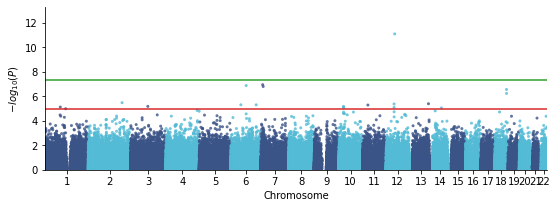

In [34]:
dfCB.rename(columns = {"CHR" : "#CHROM","BP" : "POS"}, inplace = True)
ax = manhattanplot(data=dfCB)

In [35]:
dfGS = pd.read_table("GS451_IC50.use",delim_whitespace = True)
dfGS = dfGS.dropna(how = "any",axis = 0)
dfGS

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
0,1,rs9699599,558185,G,ADD,85,1.2870,1.8060,0.07502
1,1,rs12138618,740098,A,ADD,86,-0.8031,-0.9493,0.34560
2,1,rs3131969,744045,G,ADD,164,0.3885,1.4230,0.15670
3,1,rs6672353,767376,A,ADD,85,0.7949,1.1910,0.23760
4,1,rs13302982,851671,G,ADD,166,0.1830,0.6756,0.50030
...,...,...,...,...,...,...,...,...,...
256891,22,rs762672,49411684,T,ADD,166,-0.3026,-1.0570,0.29200
256892,22,rs131711,49417023,C,ADD,80,-0.9850,-1.2450,0.21730
256893,22,rs2341011,49486501,C,ADD,175,-0.1807,-0.6921,0.48990
256894,22,rs9628187,49503532,T,ADD,166,0.2864,0.9616,0.33780


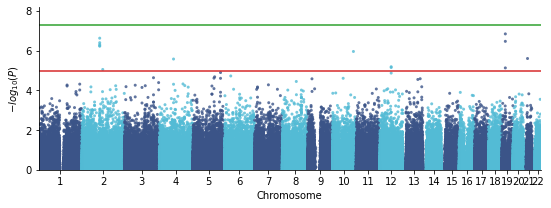

In [36]:
dfGS.rename(columns = {"CHR" : "#CHROM","BP" : "POS"}, inplace = True)
ax = manhattanplot(data=dfGS)

QQ Plot

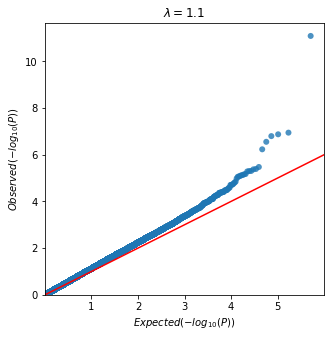

In [37]:
ax = qqplot(data=dfCB["P"])

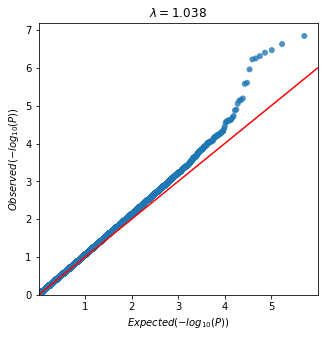

In [38]:
ax = qqplot(data=dfGS["P"])

# 5. Visualize effect of top associated SNP for one trait

In [45]:
dfCB.sort_values("P")

,#CHROM,SNP,POS,A1,TEST,NMISS,BETA,STAT,P
184404,12,rs10876043,49190411,G,ADD,161,2.002000,7.422000,8.199000e-12
112689,7,rs2158721,10615471,C,ADD,172,-1.388000,-5.555000,1.136000e-07
103114,6,rs1848390,87167533,C,ADD,163,-1.514000,-5.536000,1.338000e-07
113152,7,rs2262871,13482970,G,ADD,172,1.457000,5.483000,1.598000e-07
238521,18,rs1942161,66965592,G,ADD,165,-1.301000,-5.375000,2.803000e-07
...,...,...,...,...,...,...,...,...,...
102581,6,rs9443854,81750129,T,ADD,84,-0.000056,-0.000063,1.000000e+00
111323,6,rs7741791,168132173,A,ADD,165,-0.000013,-0.000050,1.000000e+00
38032,2,rs980065,188798710,C,ADD,165,-0.000016,-0.000055,1.000000e+00
24461,2,rs4670688,37394564,G,ADD,165,0.000015,0.000046,1.000000e+00


most significant SNP : rs10876043

In [62]:
for line in open("genotypes.vcf"):
    if line.startswith("##"):
        continue
    elif line.startswith("#"):
        pre_header_line = line.strip().split()[9:]
        header_lines = []
        for header_line in pre_header_line:
            header_lines.append(header_line.split('_')[1])
        continue
    if 'rs10876043' in line:
        genotypes = line.strip().split()[9:]
print(header_line,genotypes)
        

1176_1176 ['0/1', '0/1', './.', '0/1', '0/1', '0/1', '1/1', '1/1', '0/1', '0/1', '1/1', '0/1', '0/1', '0/1', '0/1', './.', './.', './.', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', './.', '0/1', '0/1', '0/1', '0/1', '1/1', '1/1', '0/1', '0/1', './.', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', './.', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '1/1', '0/1', '1/1', './.', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', '0/1', './.', '0/1', '0/1', '0/1', '0/1', './.', '0/1', '1/1', '0/1', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', './.', './.', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/1', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', './.', '0/0', '0

Combine two lists into a dictionary

In [103]:
geno = {}

for i in range(0, len(genotypes)):
    sample_ID = header_lines[i]
    genotype = genotypes[i]
    geno[sample_ID] = [genotype]

genotype_df = pd.DataFrame(geno).T
genotype_df
genotype_df.columns = ['geno']
genotype_df

,geno
1001,0/1
1002,0/1
1003,./.
1004,0/1
1005,0/1
...,...
1172,0/0
1173,0/0
1174,0/0
1175,0/0


Make phenotype data into df

In [110]:
CBF = open("CB1908_IC50.txt", "r")
phenotype = {}
for line in CBF:
    if line.startswith('FID'):
        continue
    field = line.strip('\n').split('\t')
    ID = field[0]
    phenotype.setdefault(ID)
    if field[2] == 'NA':
        phenotype[ID] = [np.nan]
    else:
        phenotype[ID] = [float(field[2])]

CBF_DF = pd.DataFrame(phenotype).T
CBF_DF.columns = ['IC50']
CBF_DF

,IC50
1001,6.927466
1002,11.887290
1003,12.189243
1004,11.953468
1005,8.836499
...,...
1172,5.877558
1173,5.606679
1174,7.102231
1175,6.777682


Make dataframe of both phenotypes and genotypes data

In [112]:
df_merge = pd.concat([CBF_DF, genotype_df],axis =1)
df_merge

,IC50,geno
1001,6.927466,0/1
1002,11.887290,0/1
1003,12.189243,./.
1004,11.953468,0/1
1005,8.836499,0/1
...,...,...
1172,5.877558,0/0
1173,5.606679,0/0
1174,7.102231,0/0
1175,6.777682,0/0


Remove ./. values

In [113]:
indexNames = df_merge[df_merge['geno'] == './.'].index
# Delete these row indexes from dataFrame
df_merge.drop(indexNames , inplace=True)
df_merge

,IC50,geno
1001,6.927466,0/1
1002,11.887290,0/1
1004,11.953468,0/1
1005,8.836499,0/1
1006,8.153960,0/1
...,...,...
1172,5.877558,0/0
1173,5.606679,0/0
1174,7.102231,0/0
1175,6.777682,0/0


Make boxplot

<AxesSubplot:title={'center':'IC50'}, xlabel='geno'>

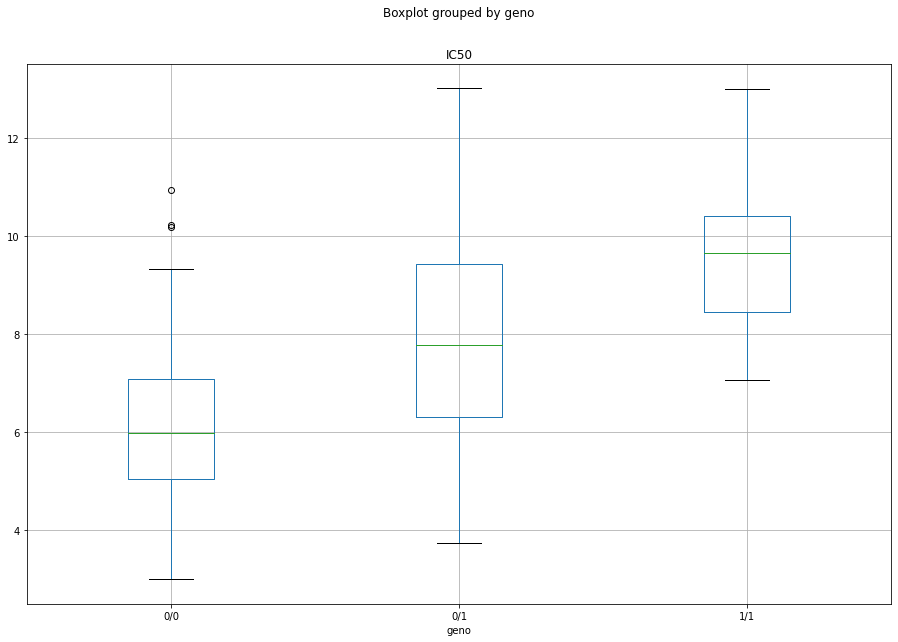

In [118]:
df_merge.boxplot(column = 'IC50', by = 'geno',figsize = (15, 10))